<a href="https://colab.research.google.com/github/rjanow/Masterarbeit/blob/main/EDA_Quantilspezifische_Analyse_des_UVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Verbinden mit der Google-Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import io, os, sys, setuptools, tokenize
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime
from datetime import timedelta
from math import sqrt

In [3]:
# Größe der Plots festlegen
matplotlib.rcParams['figure.figsize'] = (16, 9)

In [4]:
# Allgemeine Angaben
latitude = 50.2
longitude = 7.8

seconds_in_day = 24*60*60
seconds_in_year = (365.2425)*seconds_in_day

In [5]:
# Pfad zur CSV-Datei auf Google Drive
name_Messwerte = 'Messdaten_CAMS_GHI.csv'
name_Vorhersage = 'Vorhersagedaten_CAMS_VarIdx.csv'

folder_import = '/content/drive/My Drive/Colab_Notebooks/Clean_Data/'
folder_export = '/content/drive/My Drive/Colab_Notebooks/plot_daily_UVI/'

In [6]:
df_Vorhersage = pd.read_csv(folder_import + name_Vorhersage)
df_Vorhersage.set_index('Datetime', inplace=True)
df_Vorhersage.index = pd.to_datetime(df_Vorhersage.index)

In [7]:
df_Messwerte = pd.read_csv(folder_import + name_Messwerte)
df_Messwerte.set_index('Datetime', inplace=True)
df_Messwerte.index = pd.to_datetime(df_Messwerte.index)

In [8]:
hour_bins = [3, 6, 9, 12, 15, 18, 21]  # Beispiel für mögliche Bins
hour_labels = ['03:00-06:00', '06:00-09:00', '09:00-12:00', '12:00-15:00', '15:00-18:00', '18:00-21:00']
df_Messwerte['Time_bins'] = pd.cut(df_Messwerte['Hour'], bins=hour_bins, labels=hour_labels, right=False)

/tmp/ipython-input-2432775580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_df = df_Messwerte.groupby('Time_bins')['UVI'].quantile([0.1, 0.5, 0.9]).unstack()


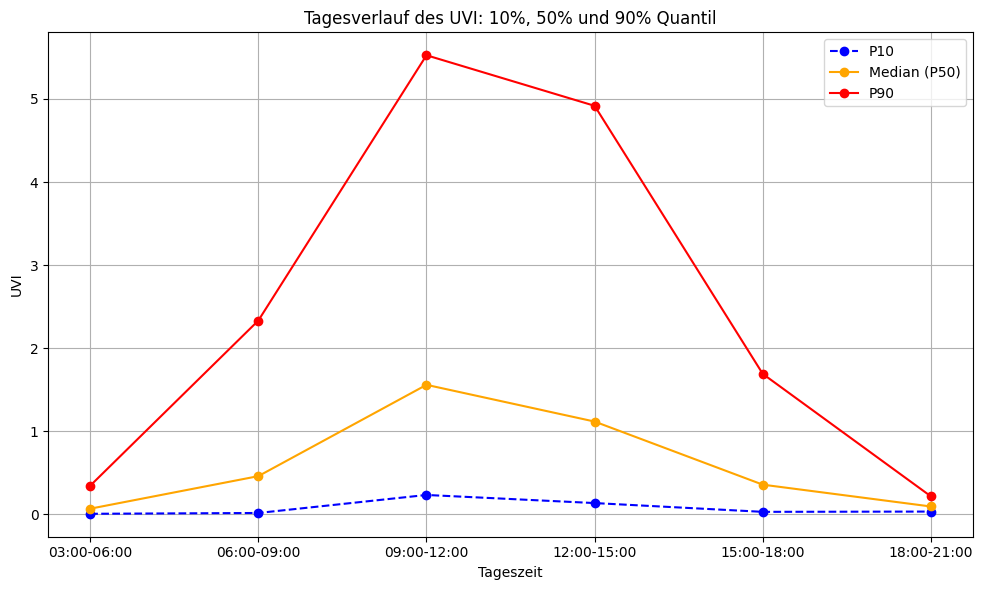

In [9]:
# Quantile pro Tageszeit berechnen (Time_bins muss kategorisch sinnvoll sortiert sein)
quantile_df = df_Messwerte.groupby('Time_bins')['UVI'].quantile([0.1, 0.5, 0.9]).unstack()

# Reihenfolge der Time_bins sicherstellen (falls nötig)
time_order = ['03:00-06:00', '06:00-09:00', '09:00-12:00',
              '12:00-15:00', '15:00-18:00', '18:00-21:00']
quantile_df = quantile_df.loc[time_order]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(quantile_df.index, quantile_df[0.1], label='P10', linestyle='dashed', color='blue', marker='o')
plt.plot(quantile_df.index, quantile_df[0.5], label='Median (P50)', linestyle='solid', color='orange', marker='o')
plt.plot(quantile_df.index, quantile_df[0.9], label='P90', linestyle='solid', color='red', marker='o')

plt.title('Tagesverlauf des UVI: 10%, 50% und 90% Quantil')
plt.xlabel('Tageszeit')
plt.ylabel('UVI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df_Messwerte

,Observation_period,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI,UVI,UVA,UVB,erythem,Datum,...,Temp,DiffGreater2,SZA,time_sin,time_cos,date_sin,date_cos,Date,Hour,Time_bins
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-15 07:20:00,2022-06-15 07:20:00,566.244,463.071,566.244,463.0710,2.408378,4.686417,281.330695,0.060209,2022-06-15,...,27.258333,0,55.189579,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,06:00-09:00
2022-06-15 07:22:00,2022-06-15 07:22:00,571.440,467.799,571.440,467.7990,2.408378,4.686417,281.330695,0.060209,2022-06-15,...,28.058333,0,54.874946,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,06:00-09:00
2022-06-15 07:24:00,2022-06-15 07:24:00,576.618,472.512,576.618,472.5120,2.462381,4.793073,287.094062,0.061560,2022-06-15,...,28.616667,0,54.560533,0.935135,-0.354291,0.282051,-0.959399,2022-06-15,7,06:00-09:00
2022-06-15 07:26:00,2022-06-15 07:26:00,581.772,477.204,581.772,477.2040,2.479048,4.817792,288.902613,0.061976,2022-06-15,...,26.791667,0,54.246355,0.932008,-0.362438,0.282051,-0.959399,2022-06-15,7,06:00-09:00
2022-06-15 07:28:00,2022-06-15 07:28:00,586.905,481.881,586.905,481.8810,2.543531,4.953151,292.450776,0.063588,2022-06-15,...,28.600000,0,53.932431,0.928810,-0.370557,0.282051,-0.959399,2022-06-15,7,06:00-09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19 05:48:00,2023-08-19 05:48:00,148.533,82.110,64.545,1.3872,0.306965,0.383479,77.133209,0.007674,2023-08-19,...,24.183333,0,78.036815,0.998630,0.052336,-0.739447,-0.673215,2023-08-19,5,03:00-06:00
2023-08-19 05:50:00,2023-08-19 05:50:00,153.717,85.974,79.956,1.8315,0.312439,0.401176,76.895074,0.007811,2023-08-19,...,24.375000,0,77.722566,0.999048,0.043619,-0.739447,-0.673215,2023-08-19,5,03:00-06:00
2023-08-19 05:52:00,2023-08-19 05:52:00,158.928,89.892,96.276,2.3115,0.314239,0.414659,75.176522,0.007856,2023-08-19,...,24.550000,0,77.408121,0.999391,0.034899,-0.739447,-0.673215,2023-08-19,5,03:00-06:00


/tmp/ipython-input-1352660437.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_df = df_Messwerte.groupby(['season', 'Time_bins'])['UVI'].quantile([0.1, 0.5, 0.9]).unstack()


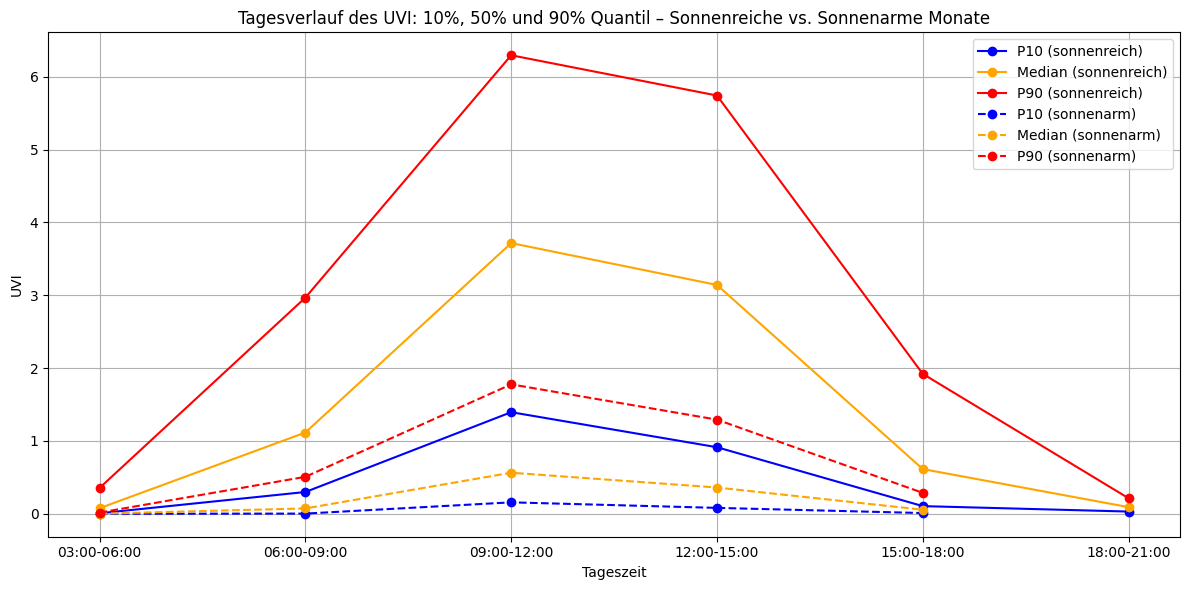

In [11]:
# Beispielhafte Definition: Sonnenreiche Monate = April bis September
df_Messwerte['Observation_period'] = pd.to_datetime(df_Messwerte['Observation_period'])
df_Messwerte['month'] = df_Messwerte['Observation_period'].dt.month
df_Messwerte['season'] = df_Messwerte['month'].apply(
    lambda m: 'sonnenreich' if 4 <= m <= 9 else 'sonnenarm'
)

# Quantile berechnen: gruppiert nach Time_bins und season
quantile_df = df_Messwerte.groupby(['season', 'Time_bins'])['UVI'].quantile([0.1, 0.5, 0.9]).unstack()
quantile_df = quantile_df.reset_index()

# Reihenfolge der Time_bins sicherstellen
time_order = ['03:00-06:00', '06:00-09:00', '09:00-12:00',
              '12:00-15:00', '15:00-18:00', '18:00-21:00']
quantile_df['Time_bins'] = pd.Categorical(quantile_df['Time_bins'], categories=time_order, ordered=True)
quantile_df = quantile_df.sort_values(['season', 'Time_bins'])

# Plot
plt.figure(figsize=(12, 6))

# Farben und Linienstile je Season
styles = {
    'sonnenreich': {'linestyle': 'solid', 'label_suffix': ' (sonnenreich)'},
    'sonnenarm': {'linestyle': 'dashed', 'label_suffix': ' (sonnenarm)'}
}

for season in ['sonnenreich', 'sonnenarm']:
    df_s = quantile_df[quantile_df['season'] == season]
    plt.plot(df_s['Time_bins'], df_s[0.1], label=f'P10{styles[season]["label_suffix"]}',
             linestyle=styles[season]['linestyle'], color='blue', marker='o')
    plt.plot(df_s['Time_bins'], df_s[0.5], label=f'Median{styles[season]["label_suffix"]}',
             linestyle=styles[season]['linestyle'], color='orange', marker='o')
    plt.plot(df_s['Time_bins'], df_s[0.9], label=f'P90{styles[season]["label_suffix"]}',
             linestyle=styles[season]['linestyle'], color='red', marker='o')

plt.title('Tagesverlauf des UVI: 10%, 50% und 90% Quantil – Sonnenreiche vs. Sonnenarme Monate')
plt.xlabel('Tageszeit')
plt.ylabel('UVI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df_Messwerte

,Observation_period,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI,UVI,UVA,UVB,erythem,Datum,...,SZA,time_sin,time_cos,date_sin,date_cos,Date,Hour,Time_bins,month,season
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-15 07:20:00,2022-06-15 07:20:00,566.244,463.071,566.244,463.0710,2.408378,4.686417,281.330695,0.060209,2022-06-15,...,55.189579,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,06:00-09:00,6,sonnenreich
2022-06-15 07:22:00,2022-06-15 07:22:00,571.440,467.799,571.440,467.7990,2.408378,4.686417,281.330695,0.060209,2022-06-15,...,54.874946,0.938191,-0.346117,0.282051,-0.959399,2022-06-15,7,06:00-09:00,6,sonnenreich
2022-06-15 07:24:00,2022-06-15 07:24:00,576.618,472.512,576.618,472.5120,2.462381,4.793073,287.094062,0.061560,2022-06-15,...,54.560533,0.935135,-0.354291,0.282051,-0.959399,2022-06-15,7,06:00-09:00,6,sonnenreich
2022-06-15 07:26:00,2022-06-15 07:26:00,581.772,477.204,581.772,477.2040,2.479048,4.817792,288.902613,0.061976,2022-06-15,...,54.246355,0.932008,-0.362438,0.282051,-0.959399,2022-06-15,7,06:00-09:00,6,sonnenreich
2022-06-15 07:28:00,2022-06-15 07:28:00,586.905,481.881,586.905,481.8810,2.543531,4.953151,292.450776,0.063588,2022-06-15,...,53.932431,0.928810,-0.370557,0.282051,-0.959399,2022-06-15,7,06:00-09:00,6,sonnenreich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19 05:48:00,2023-08-19 05:48:00,148.533,82.110,64.545,1.3872,0.306965,0.383479,77.133209,0.007674,2023-08-19,...,78.036815,0.998630,0.052336,-0.739447,-0.673215,2023-08-19,5,03:00-06:00,8,sonnenreich
2023-08-19 05:50:00,2023-08-19 05:50:00,153.717,85.974,79.956,1.8315,0.312439,0.401176,76.895074,0.007811,2023-08-19,...,77.722566,0.999048,0.043619,-0.739447,-0.673215,2023-08-19,5,03:00-06:00,8,sonnenreich
2023-08-19 05:52:00,2023-08-19 05:52:00,158.928,89.892,96.276,2.3115,0.314239,0.414659,75.176522,0.007856,2023-08-19,...,77.408121,0.999391,0.034899,-0.739447,-0.673215,2023-08-19,5,03:00-06:00,8,sonnenreich
